In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

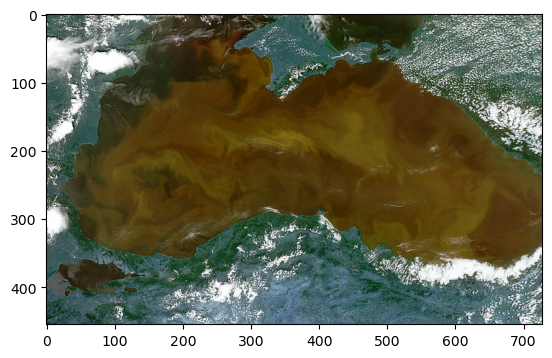

In [2]:
image = cv2.imread("sati.jpg")
plt.imshow(image)
plt.show()

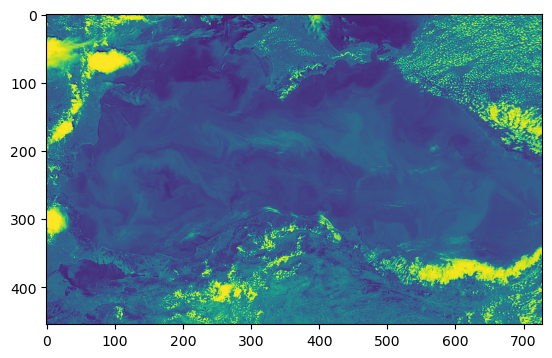

In [3]:
img_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
plt.show()

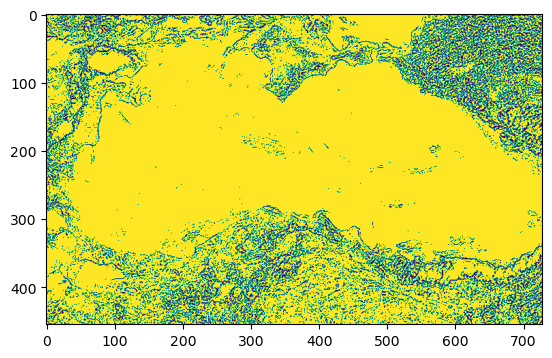

In [32]:
img1m = cv2.medianBlur(img_gray,3)
ath2 = cv2.adaptiveThreshold(img1m,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,3)
plt.imshow(ath2)
plt.show()

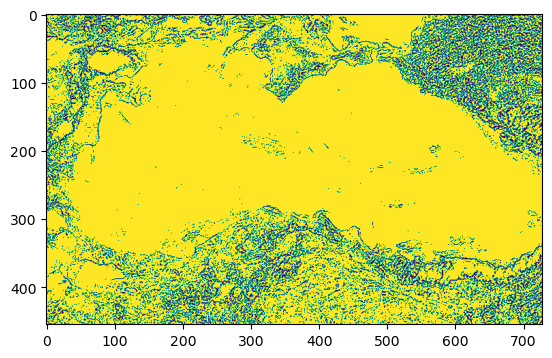

In [33]:
kernal = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(ath2,cv2.MORPH_OPEN,kernal, iterations = 0)
plt.imshow(opening)
plt.show()

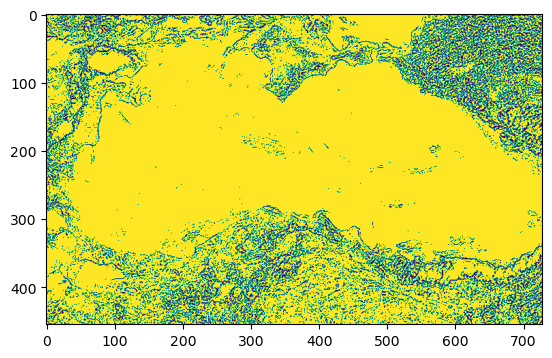

In [34]:
sure_bg = cv2.dilate(opening,kernal,iterations = 0)
plt.imshow(sure_bg)
plt.show()

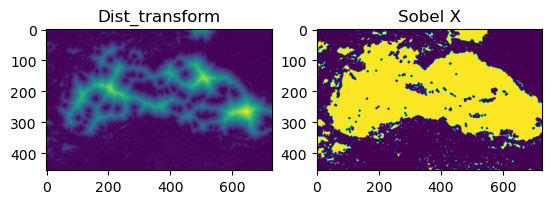

In [35]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
plt.subplot(1,2,1),plt.imshow(dist_transform)
plt.title('Dist_transform'),
ret, sure_fg = cv2.threshold(dist_transform,0.05
                             *dist_transform.max(),255,0)
plt.subplot(1,2,2), plt.imshow(sure_fg)
plt.title('Sobel X')
plt.show()

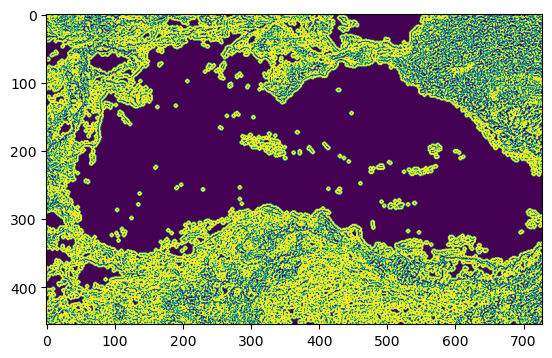

In [57]:


# Convert sure_fg to uint8 if it's not already
sure_fg = np.uint8(sure_fg)

# Subtract foreground from background to get the unknown region
unknown = cv2.subtract(sure_bg, sure_fg)

# Visualize the result with a colormap for better contrast
plt.imshow(unknown)  # Display in grayscale for binary images
plt.show()


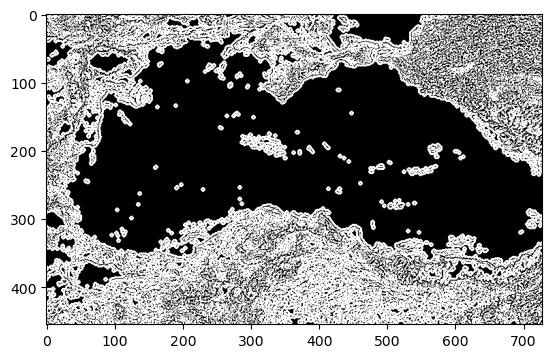

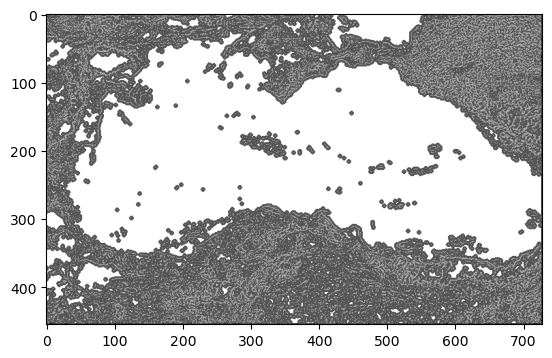

In [68]:
# Threshold to highlight the unknown region (optional step)
_, unknown_thresh = cv2.threshold(unknown, 0, 255, cv2.THRESH_BINARY)

# Visualize with 'jet' colormap to distinguish different regions
plt.imshow(unknown_thresh,  cmap = 'gray')
plt.show()
markers[unknown ==255]
plt.imshow(markers, cmap='gray')
plt.show()

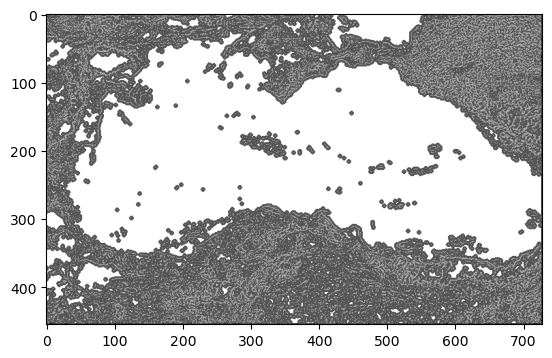

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Modify the markers array where unknown is 255
markers[unknown == 255] = 0  # Example: set unknown regions to 0 or any other specific value

# Visualize the modified markers array with a colormap for better distinction
plt.imshow(markers, cmap='gray')  # Using 'jet' colormap for clear separation of regions
plt.show()


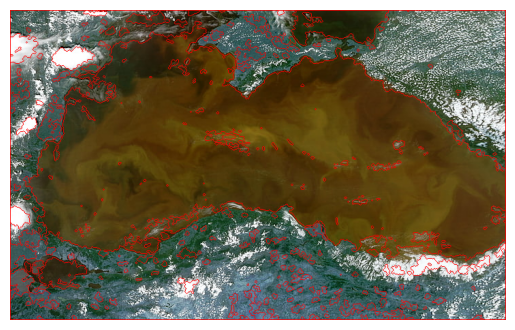

In [54]:
markers = cv2.watershed(image,markers)
image[markers == -1] = (255,0,0)
plt.imshow(image)
plt.axis('off')
plt.show()